### Import Essential Modules

In [3]:
!pip install missingno
!pip install xgboost
!pip install mlxtend
!pip install graphviz

In [4]:
!pip install keras-tuner

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import graphviz
%matplotlib inline

In [6]:
df = pd.read_csv('dataset_sdn.csv')
df.head(10)

,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,...,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
0,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,UDP,3,143928631,3917,0,0.0,0.0,0
1,11605,1,10.0.0.1,10.0.0.8,126395,134737070,280,734000000,2.810000e+11,2,...,451,0,UDP,4,3842,3520,0,0.0,0.0,0
2,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,1,3795,1242,0,0.0,0.0,0
3,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,2,3688,1492,0,0.0,0.0,0
4,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,3,3413,3665,0,0.0,0.0,0
5,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,1,3795,1402,0,0.0,0.0,0
6,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,UDP,4,3665,3413,0,0.0,0.0,0
7,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,UDP,1,3775,1492,0,0.0,0.0,0
8,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,UDP,2,3845,1402,0,0.0,0.0,0
9,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,4,354583059,4295,16578,0.0,16578.0,0


### Data Preprocessing

#### Dataset Dimensions

In [7]:
print("This Dataset has {} rows and {} columns".format(df.shape[0], df.shape[1]))

This Dataset has 104345 rows and 23 columns


#### Concise summary of dataset

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104345 entries, 0 to 104344
Data columns (total 23 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   dt           104345 non-null  int64  
 1   switch       104345 non-null  int64  
 2   src          104345 non-null  object 
 3   dst          104345 non-null  object 
 4   pktcount     104345 non-null  int64  
 5   bytecount    104345 non-null  int64  
 6   dur          104345 non-null  int64  
 7   dur_nsec     104345 non-null  int64  
 8   tot_dur      104345 non-null  float64
 9   flows        104345 non-null  int64  
 10  packetins    104345 non-null  int64  
 11  pktperflow   104345 non-null  int64  
 12  byteperflow  104345 non-null  int64  
 13  pktrate      104345 non-null  int64  
 14  Pairflow     104345 non-null  int64  
 15  Protocol     104345 non-null  object 
 16  port_no      104345 non-null  int64  
 17  tx_bytes     104345 non-null  int64  
 18  rx_bytes     104345 non-

#### Descriptive statistics of dataset

In [9]:
df.describe()

,dt,switch,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,packetins,pktperflow,byteperflow,pktrate,Pairflow,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
count,104345.000000,104345.000000,104345.000000,1.043450e+05,104345.000000,1.043450e+05,1.043450e+05,104345.000000,104345.000000,104345.000000,1.043450e+05,104345.000000,104345.000000,104345.000000,1.043450e+05,1.043450e+05,104345.000000,103839.000000,103839.000000,104345.000000
mean,17927.514169,4.214260,52860.954746,3.818660e+07,321.497398,4.613880e+08,3.218865e+11,5.654234,5200.383468,6381.715291,4.716150e+06,212.210676,0.600987,2.331094,9.325264e+07,9.328039e+07,998.899756,1003.811420,2007.578742,0.390857
std,11977.642655,1.956327,52023.241460,4.877748e+07,283.518232,2.770019e+08,2.834029e+11,2.950036,5257.001450,7404.777808,7.560116e+06,246.855123,0.489698,1.084333,1.519380e+08,1.330004e+08,2423.471618,2054.887034,3144.437173,0.487945
min,2488.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,2.000000,4.000000,-130933.000000,-1.464426e+08,-4365.000000,0.000000,1.000000,2.527000e+03,8.560000e+02,0.000000,0.000000,0.000000,0.000000
25%,7098.000000,3.000000,808.000000,7.957600e+04,127.000000,2.340000e+08,1.270000e+11,3.000000,1943.000000,29.000000,2.842000e+03,0.000000,0.000000,1.000000,4.743000e+03,3.539000e+03,0.000000,0.000000,0.000000,0.000000
50%,11905.000000,4.000000,42828.000000,6.471930e+06,251.000000,4.180000e+08,2.520000e+11,5.000000,3024.000000,8305.000000,5.521680e+05,276.000000,1.000000,2.000000,4.219610e+06,1.338339e+07,0.000000,0.000000,4.000000,0.000000
75%,29952.000000,5.000000,94796.000000,7.620354e+07,412.000000,7.030000e+08,4.130000e+11,7.000000,7462.000000,10017.000000,9.728112e+06,333.000000,1.000000,3.000000,1.356398e+08,1.439277e+08,251.000000,557.000000,3838.000000,1.000000
max,42935.000000,10.000000,260006.000000,1.471280e+08,1881.000000,9.990000e+08,1.880000e+12,17.000000,25224.000000,19190.000000,1.495387e+07,639.000000,1.000000,5.000000,1.269982e+09,9.905962e+08,20580.000000,16577.000000,20580.000000,1.000000


#### heatmap of missing values

<Axes: >

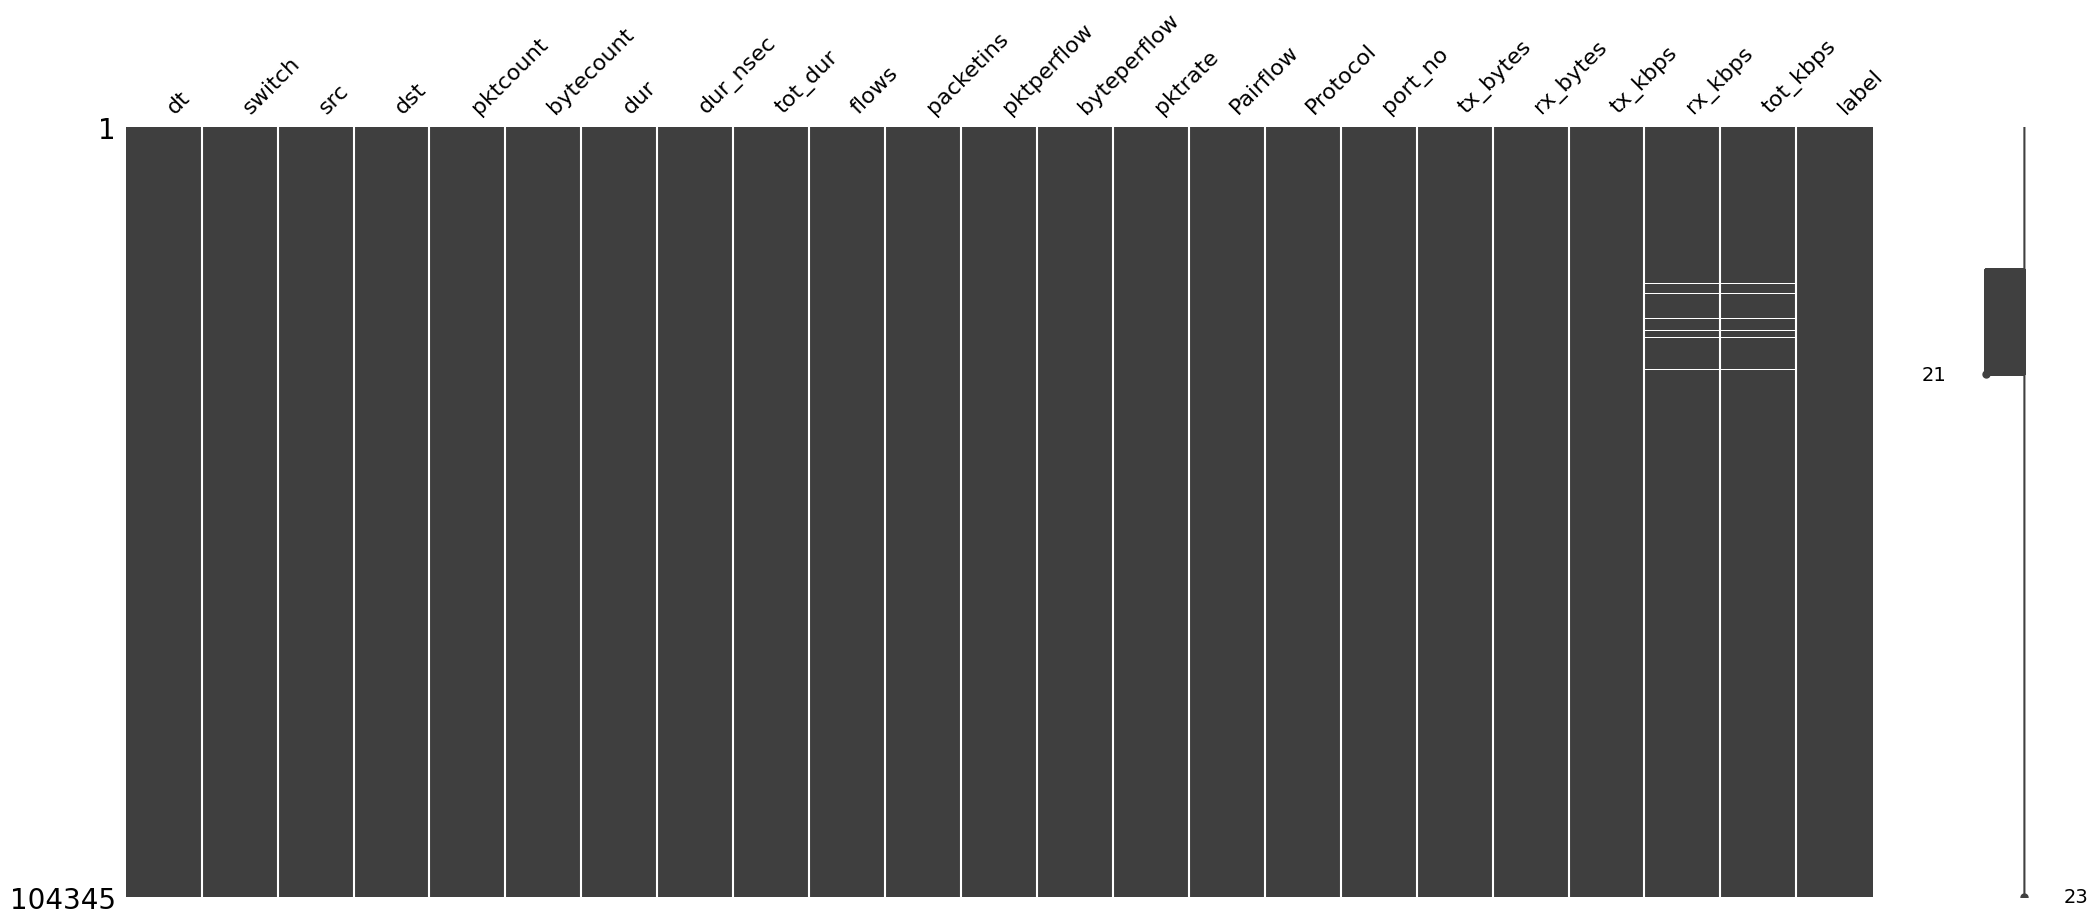

In [10]:
msno.matrix(df)

#### Count of null values in each feature

In [11]:
df.isnull().sum()

dt               0
switch           0
src              0
dst              0
pktcount         0
bytecount        0
dur              0
dur_nsec         0
tot_dur          0
flows            0
packetins        0
pktperflow       0
byteperflow      0
pktrate          0
Pairflow         0
Protocol         0
port_no          0
tx_bytes         0
rx_bytes         0
tx_kbps          0
rx_kbps        506
tot_kbps       506
label            0
dtype: int64

In [12]:
(df.isnull().sum()/df.isnull().count())*100

dt             0.00000
switch         0.00000
src            0.00000
dst            0.00000
pktcount       0.00000
bytecount      0.00000
dur            0.00000
dur_nsec       0.00000
tot_dur        0.00000
flows          0.00000
packetins      0.00000
pktperflow     0.00000
byteperflow    0.00000
pktrate        0.00000
Pairflow       0.00000
Protocol       0.00000
port_no        0.00000
tx_bytes       0.00000
rx_bytes       0.00000
tx_kbps        0.00000
rx_kbps        0.48493
tot_kbps       0.48493
label          0.00000
dtype: float64

#### Drop rows with null values

In [13]:
df.dropna(inplace=True)

#### Info after handling Null Values

In [14]:
print(df.isnull().sum())
print("This Dataframe has {} rows and {} columns after removing null values".format(df.shape[0], df.shape[1]))

dt             0
switch         0
src            0
dst            0
pktcount       0
bytecount      0
dur            0
dur_nsec       0
tot_dur        0
flows          0
packetins      0
pktperflow     0
byteperflow    0
pktrate        0
Pairflow       0
Protocol       0
port_no        0
tx_bytes       0
rx_bytes       0
tx_kbps        0
rx_kbps        0
tot_kbps       0
label          0
dtype: int64
This Dataframe has 103839 rows and 23 columns after removing null values


#### Distribution of Target Class

In [15]:
malign = df[df['label'] == 1]
benign = df[df['label'] == 0]

print('Number of DDOS attacks that has occured :',round((len(malign)/df.shape[0])*100,2),'%')
print('Number of DDOS attacks that has not occured :',round((len(benign)/df.shape[0])*100,2),'%')

Number of DDOS attacks that has occured : 39.01 %
Number of DDOS attacks that has not occured : 60.99 %


#### Barplot of Target Class

Text(0, 0.5, 'Frequency %')

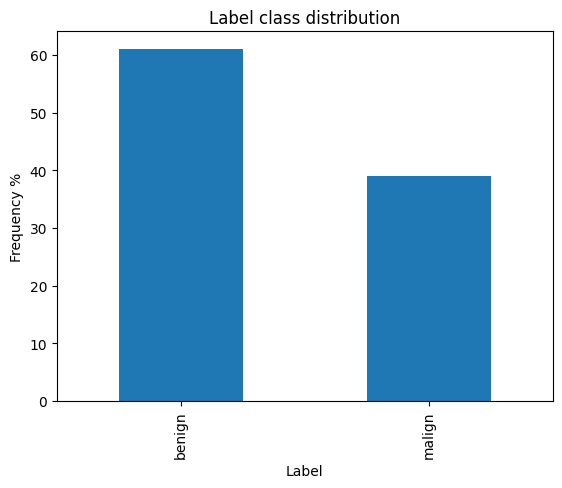

In [16]:
# Let's plot the Label class against the Frequency
labels = ['benign','malign']
classes = pd.value_counts(df['label'], sort = True) / df['label'].count() *100
classes.plot(kind = 'bar')
plt.title("Label class distribution")
plt.xticks(range(2), labels)
plt.xlabel("Label")
plt.ylabel("Frequency %")

#### Pairplot of select features

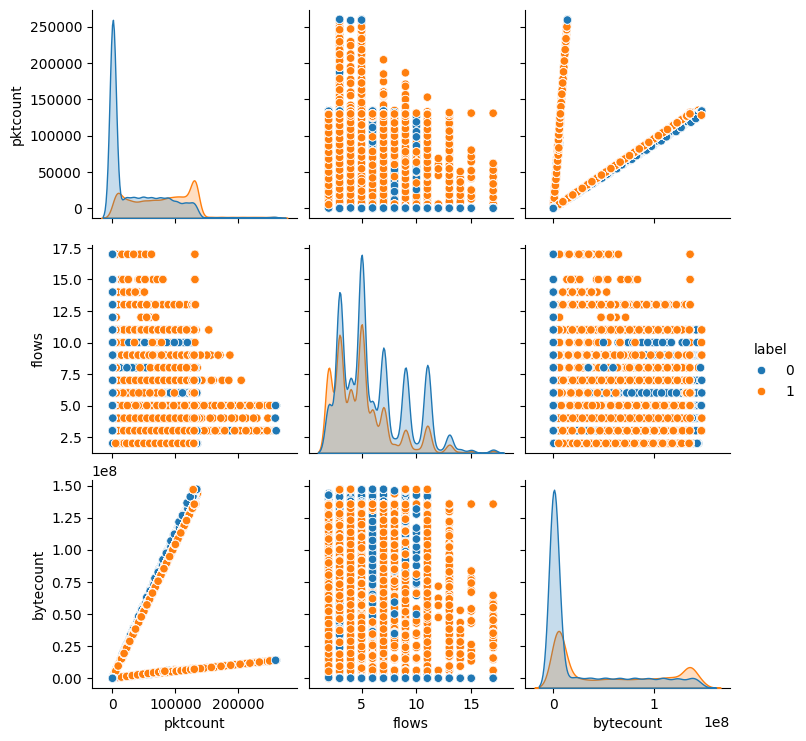

In [17]:
sns.pairplot(df,hue="label",vars=['pktcount','flows','bytecount'])

#### Columns in the dataset

In [18]:
df.columns

Index(['dt', 'switch', 'src', 'dst', 'pktcount', 'bytecount', 'dur',
       'dur_nsec', 'tot_dur', 'flows', 'packetins', 'pktperflow',
       'byteperflow', 'pktrate', 'Pairflow', 'Protocol', 'port_no', 'tx_bytes',
       'rx_bytes', 'tx_kbps', 'rx_kbps', 'tot_kbps', 'label'],
      dtype='object')

#### Unique values in each column

In [19]:
print(df.apply(lambda col: col.unique()))

dt             [11425, 11605, 11455, 11515, 9906, 11335, 1157...
switch                           [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
src            [10.0.0.1, 10.0.0.2, 10.0.0.4, 10.0.0.10, 10.0...
dst            [10.0.0.8, 10.0.0.7, 10.0.0.3, 10.0.0.5, 10.0....
pktcount       [45304, 126395, 90333, 103866, 85676, 32914, 4...
bytecount      [48294064, 134737070, 96294978, 110721156, 913...
dur            [100, 280, 200, 230, 190, 73, 10, 250, 80, 260...
dur_nsec       [716000000, 734000000, 744000000, 747000000, 7...
tot_dur        [101000000000.0, 281000000000.0, 201000000000....
flows          [3, 2, 4, 5, 6, 7, 8, 11, 9, 10, 13, 15, 17, 1...
packetins      [1943, 1931, 1790, 1306, 1910, 2242, 2175, 110...
pktperflow     [13535, 13531, 13534, 13533, 13306, 13385, 0, ...
byteperflow    [14428310, 14424046, 14427244, 14426178, 14184...
pktrate        [451, 443, 446, 0, 288, 450, 448, 449, 455, 14...
Pairflow                                                  [0, 1]
Protocol                 

#### Numerical Features

In [20]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
print("The number of numerical features is",len(numerical_features),"and they are : \n",numerical_features)

The number of numerical features is 20 and they are : 
 ['dt', 'switch', 'pktcount', 'bytecount', 'dur', 'dur_nsec', 'tot_dur', 'flows', 'packetins', 'pktperflow', 'byteperflow', 'pktrate', 'Pairflow', 'port_no', 'tx_bytes', 'rx_bytes', 'tx_kbps', 'rx_kbps', 'tot_kbps', 'label']


#### Categorical Features

In [21]:
categorical_features = [feature for feature in df.columns if df[feature].dtypes == 'O']
print("The number of categorical features is",len(categorical_features),"and they are : \n",categorical_features)

The number of categorical features is 3 and they are : 
 ['src', 'dst', 'Protocol']


#### Number of Unique values in the numerical features

In [22]:
# number of unique values in each numerical variable
df[numerical_features].nunique(axis=0)

dt               858
switch            10
pktcount        9044
bytecount       9270
dur              840
dur_nsec        1000
tot_dur         4183
flows             15
packetins        168
pktperflow      2092
byteperflow     2793
pktrate          446
Pairflow           2
port_no            5
tx_bytes       12257
rx_bytes       11623
tx_kbps         1800
rx_kbps         1730
tot_kbps        2259
label              2
dtype: int64

#### Discrete numerical features

In [23]:
#discrete numerical features
discrete_feature = [feature for feature in numerical_features if df[feature].nunique()<=15 and feature != 'label']
print("The number of discrete features is",len(discrete_feature),"and they are : \n",discrete_feature)

The number of discrete features is 4 and they are : 
 ['switch', 'flows', 'Pairflow', 'port_no']


In [24]:
df[discrete_feature].head(10)

,switch,flows,Pairflow,port_no
0,1,3,0,3
1,1,2,0,4
2,1,3,0,1
3,1,3,0,2
4,1,3,0,3
5,1,3,0,1
6,1,3,0,4
7,1,3,0,1
8,1,3,0,2
9,1,3,0,4


#### Continuous features

In [25]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature + ['label']]
print("The number of continuous_feature features is",len(continuous_feature),"and they are : \n",continuous_feature)

The number of continuous_feature features is 15 and they are : 
 ['dt', 'pktcount', 'bytecount', 'dur', 'dur_nsec', 'tot_dur', 'packetins', 'pktperflow', 'byteperflow', 'pktrate', 'tx_bytes', 'rx_bytes', 'tx_kbps', 'rx_kbps', 'tot_kbps']


### Exploratory Data Analysis

#### Plotting function definition

In [26]:
def countplot_distribution(col):
    sns.set_theme(style="darkgrid")
    sns.countplot(y=col, data=df).set(title = 'Distribution of ' + col)

def histplot_distribution(col):
    sns.set_theme(style="darkgrid")
    sns.histplot(data=df,x=col, kde=True,color="red").set(title = 'Distribution of ' + col)

#### Visualize the distribution of Categorical features

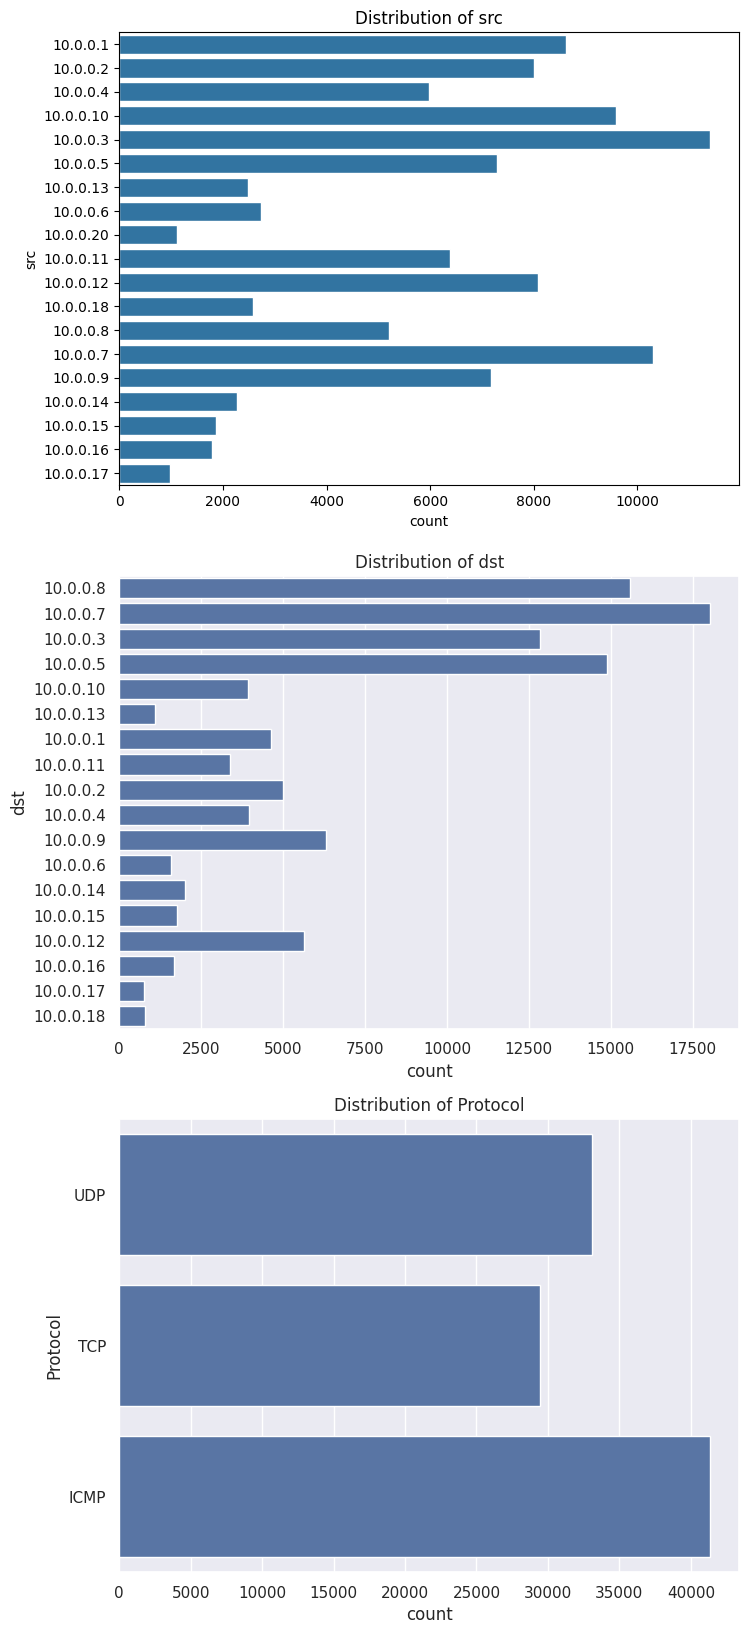

In [27]:
## Lets analyse the categorical values by creating histograms to understand the distribution
f = plt.figure(figsize=(8,20))
for i in range(len(categorical_features)):
    f.add_subplot(len(categorical_features), 1, i+1)
    countplot_distribution(categorical_features[i])
plt.show()

#### Visualize the quartiles of categorical features wrt total duration

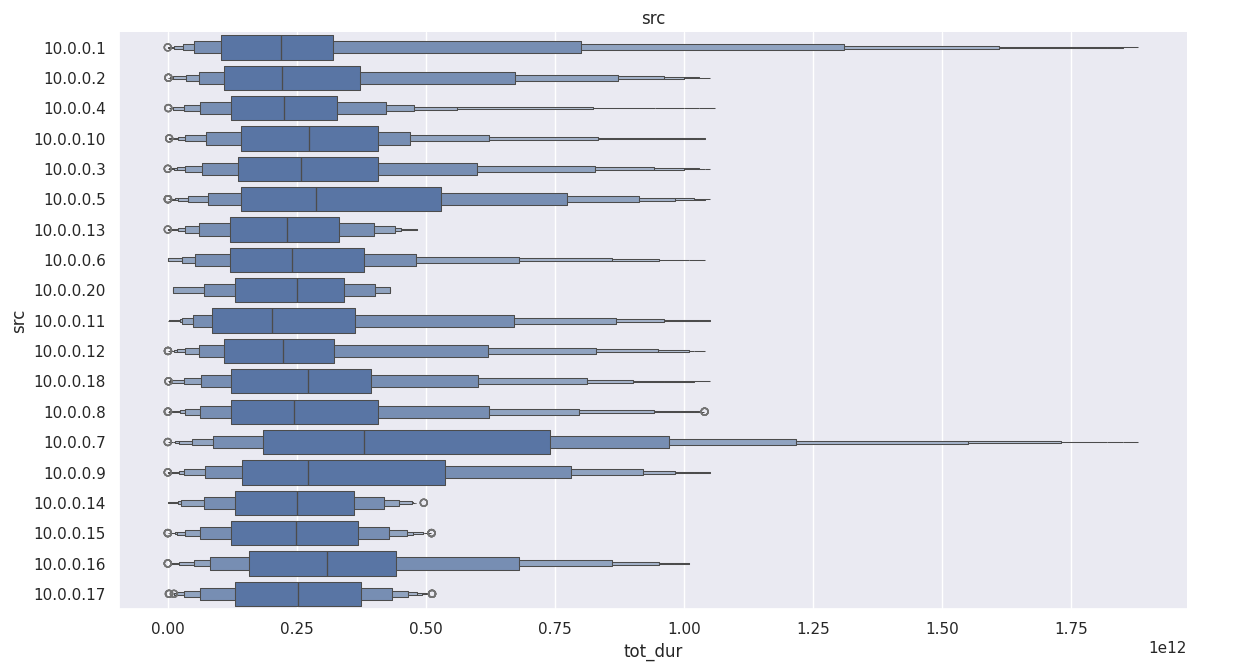

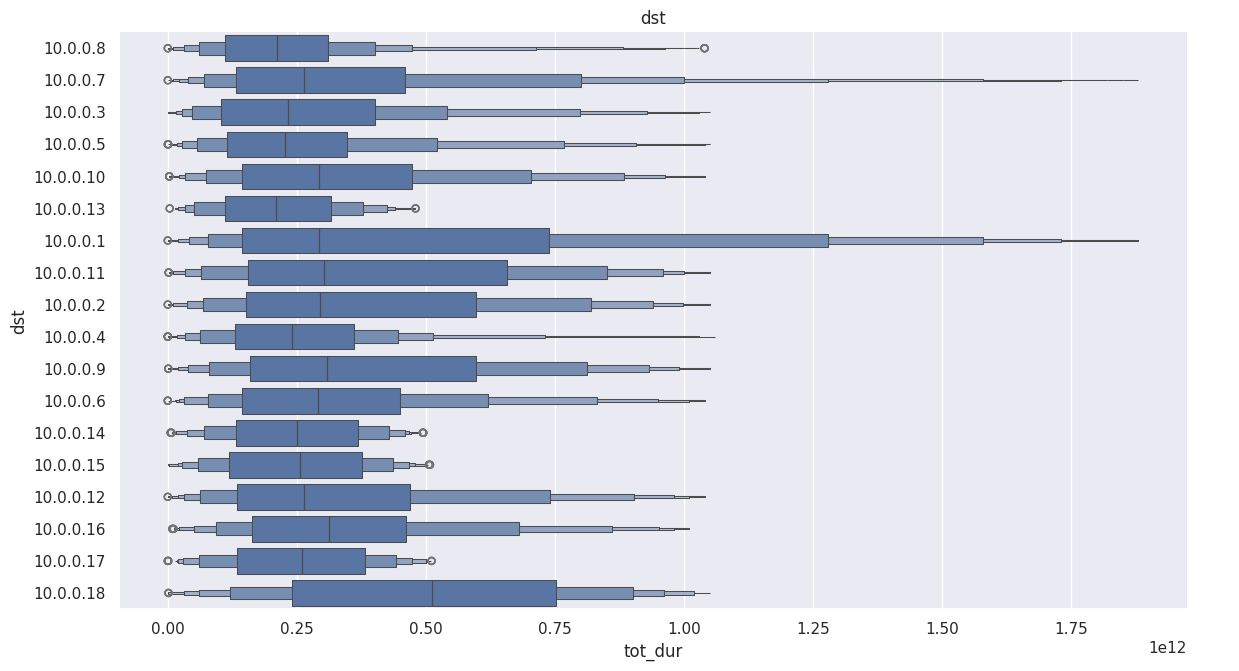

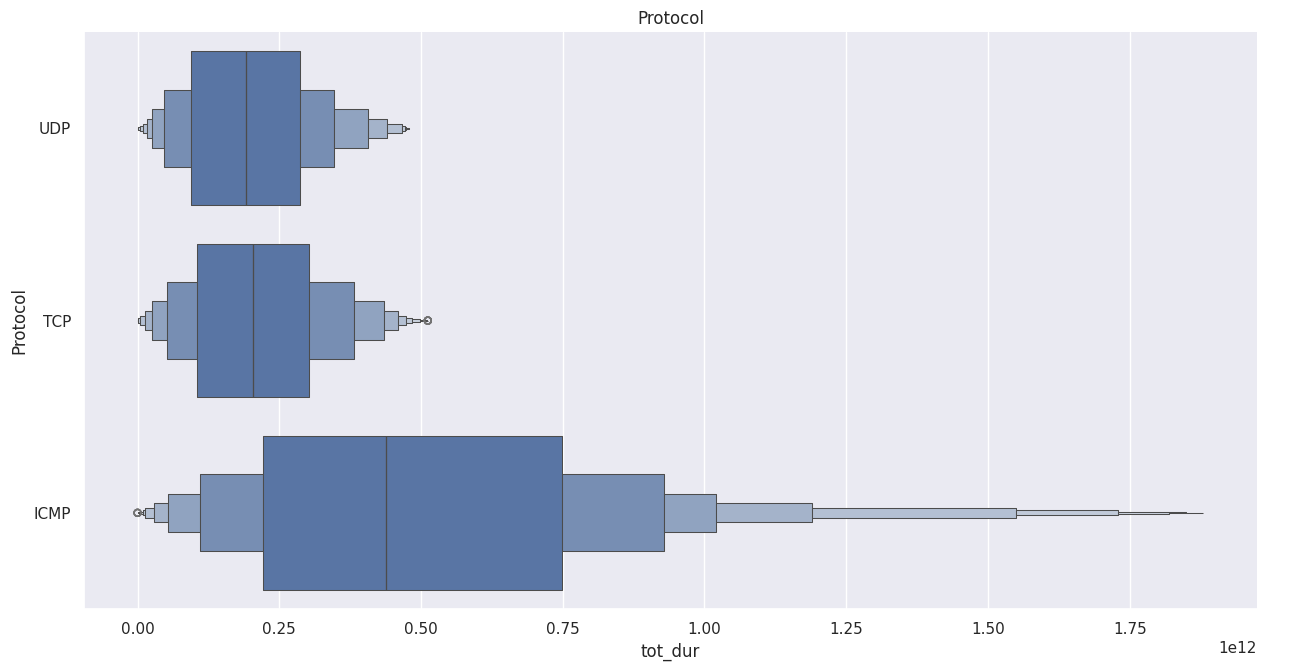

In [28]:
for i in range(len(categorical_features)):
    g = sns.catplot(data=df,x="tot_dur",y=categorical_features[i],kind="boxen").set(title = categorical_features[i])
    g.fig.set_figheight(7)
    g.fig.set_figwidth(15)

#### Visualize the distribution of continuous features

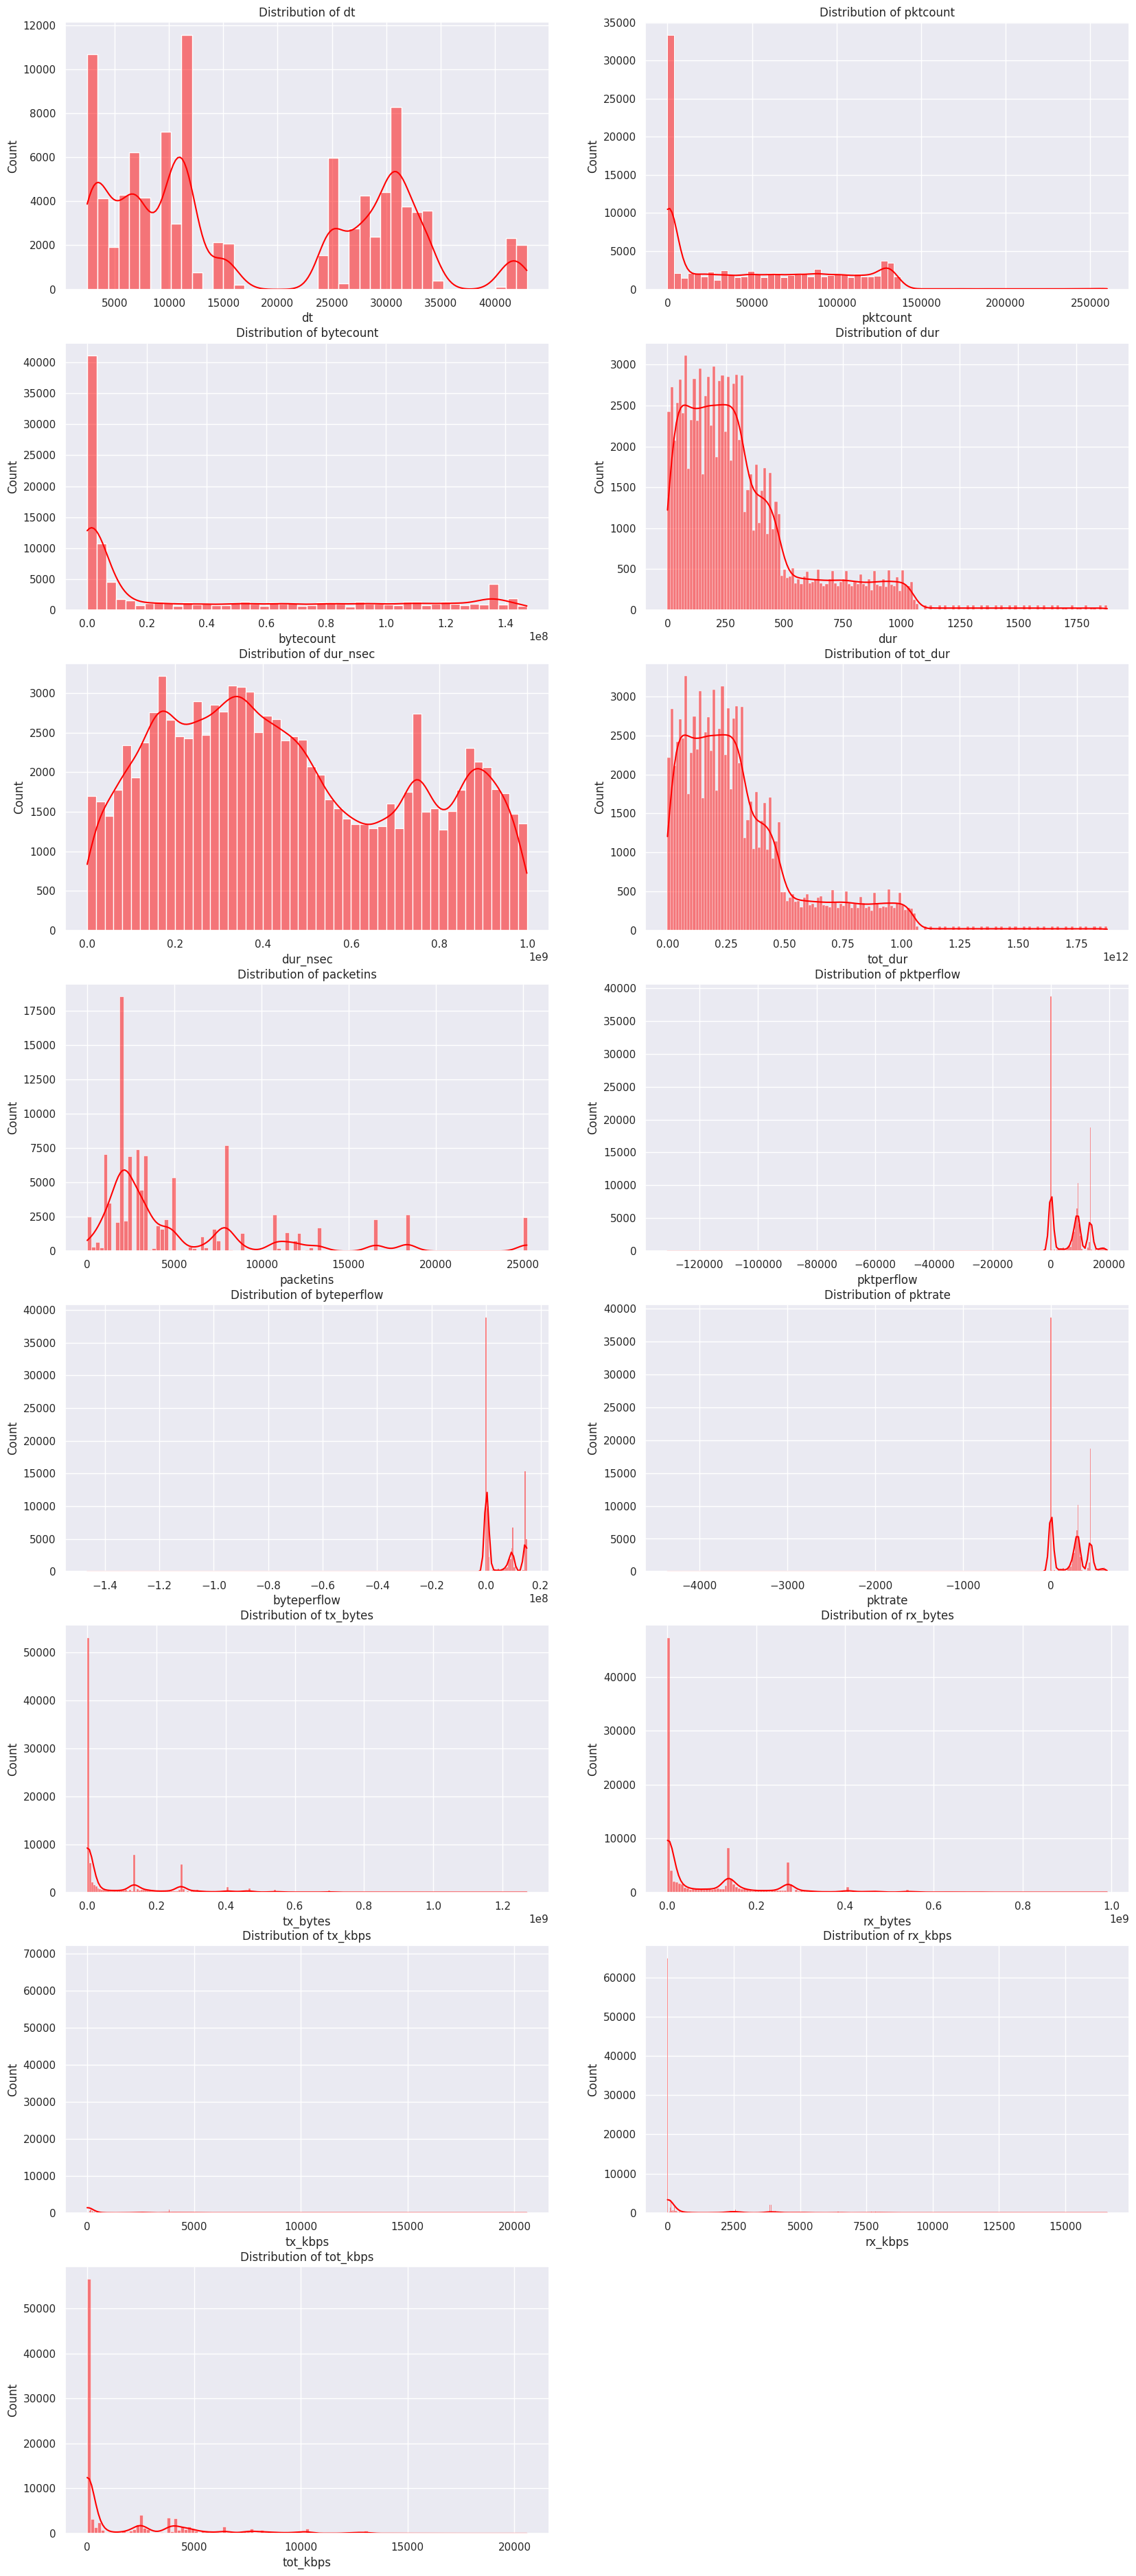

In [29]:
## Lets analyse the continuous values by creating histograms to understand the distribution
f = plt.figure(figsize=(20,90))
for i in range(len(continuous_feature)):
    f.add_subplot(len(continuous_feature), 2, i+1)
    histplot_distribution(continuous_feature[i])
plt.show()

#### Visualize the distribution of continuous features wrt packet count, protocol and type of attack

<Figure size 2000x2000 with 0 Axes>

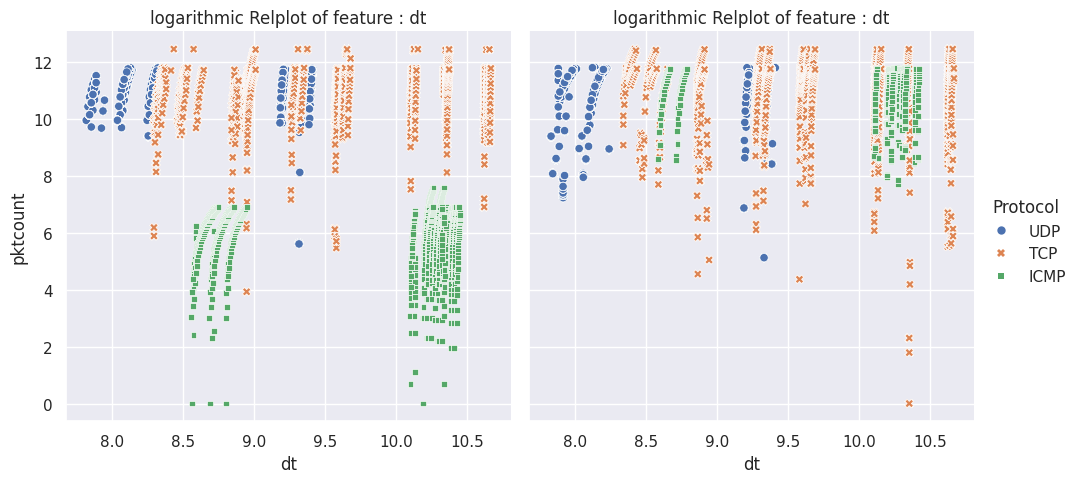

<Figure size 2000x2000 with 0 Axes>

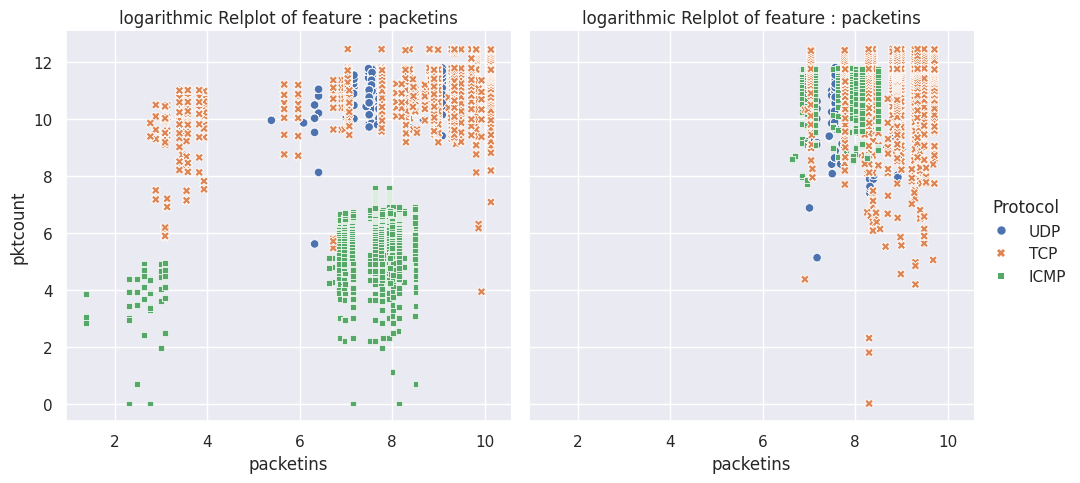

<Figure size 2000x2000 with 0 Axes>

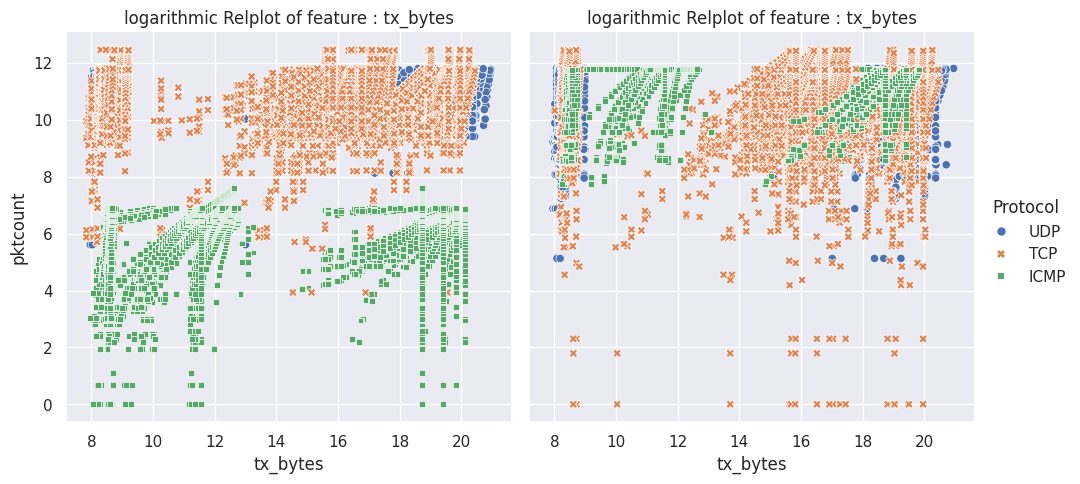

<Figure size 2000x2000 with 0 Axes>

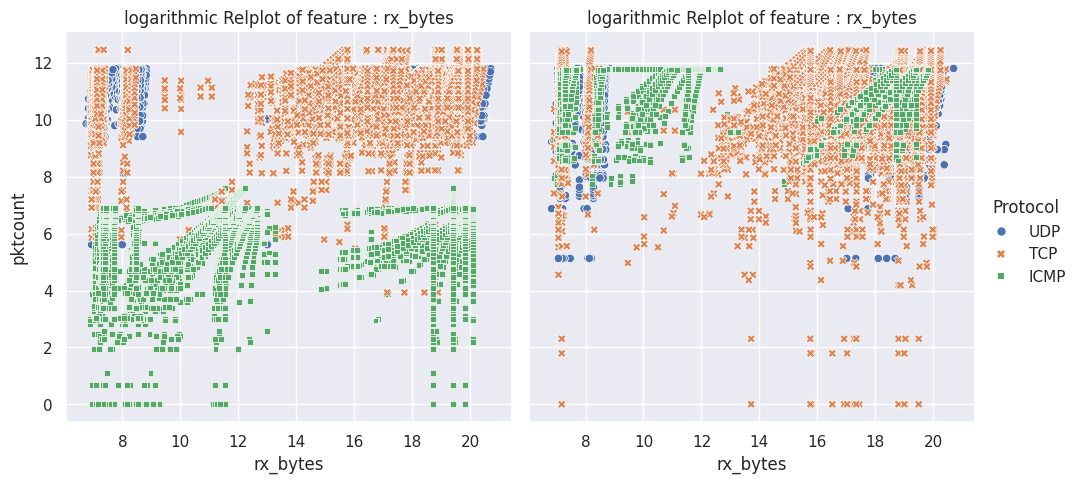

In [30]:
## Relplot of log(variable)
import warnings
warnings.filterwarnings("ignore")
for feature in continuous_feature:
    data=df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data['pktcount']=np.log(data['pktcount'])
        plt.figure(figsize=(20,20))
        sns.relplot(data=data, x=data[feature],y=data['pktcount'],hue="Protocol",style="Protocol",
                    col="label",kind="scatter").set(title="logarithmic Relplot of feature : " + feature)

#### Visualize the distribution of numerical discrete features

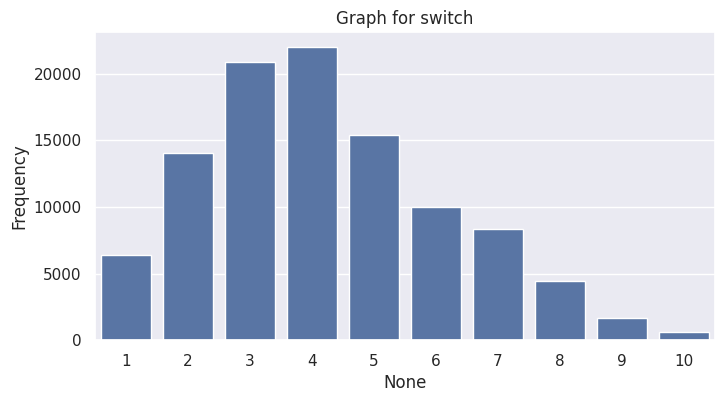

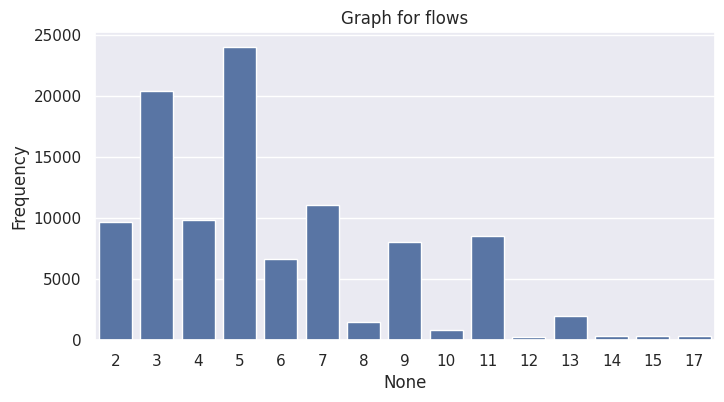

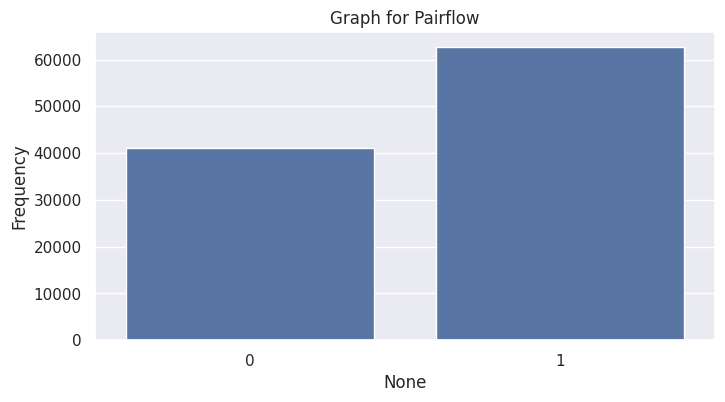

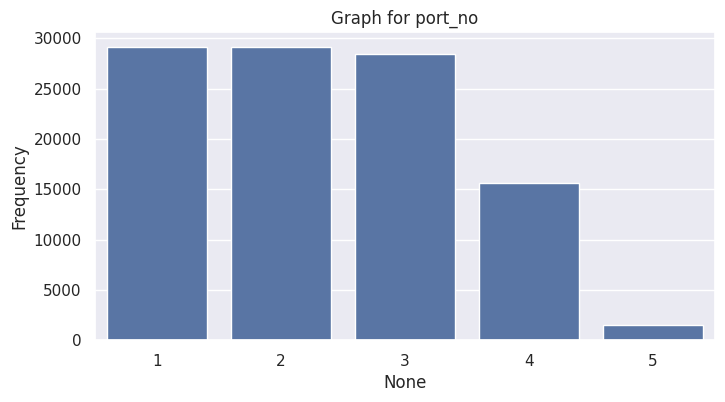

In [31]:
for feature in discrete_feature:
    plt.figure(figsize=(8,4))
    cat_num = df[feature].value_counts()
    sns.barplot(x=cat_num.index, y = cat_num).set(title = "Graph for "+feature, ylabel="Frequency")
    plt.show()

In [32]:
def get_percentage_malign_protocols():
    arr = [x for x, y in zip(df['Protocol'], df['label']) if y == 1]
    perc_arr = []
    for i in ['UDP','TCP','ICMP']:
        perc_arr.append(arr.count(i)/len(arr) *100)
    return perc_arr

#### Distribution of protocols for malign attacks

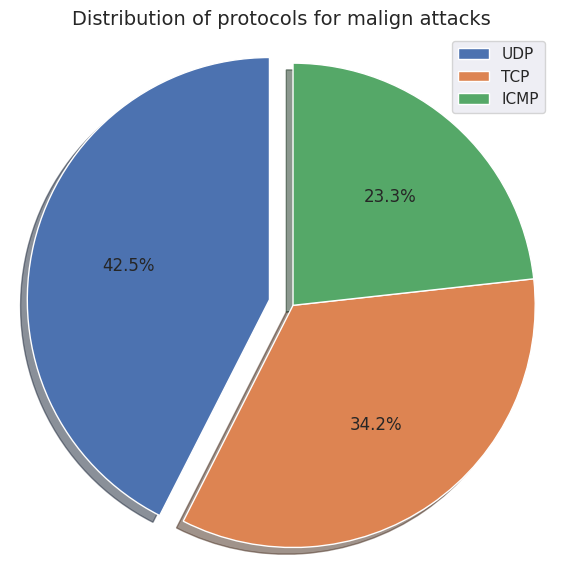

In [33]:
fig1, ax1 = plt.subplots(figsize=[7,7])
ax1.pie(get_percentage_malign_protocols(), explode=(0.1, 0, 0), autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
ax1.legend(['UDP', 'TCP', 'ICMP'],loc="best")
plt.title('Distribution of protocols for malign attacks',fontsize = 14)
plt.show()

#### Checking for outliers in Packet count feature

Text(0.5, 1.0, 'Boxplot, Packet count for different protocols')

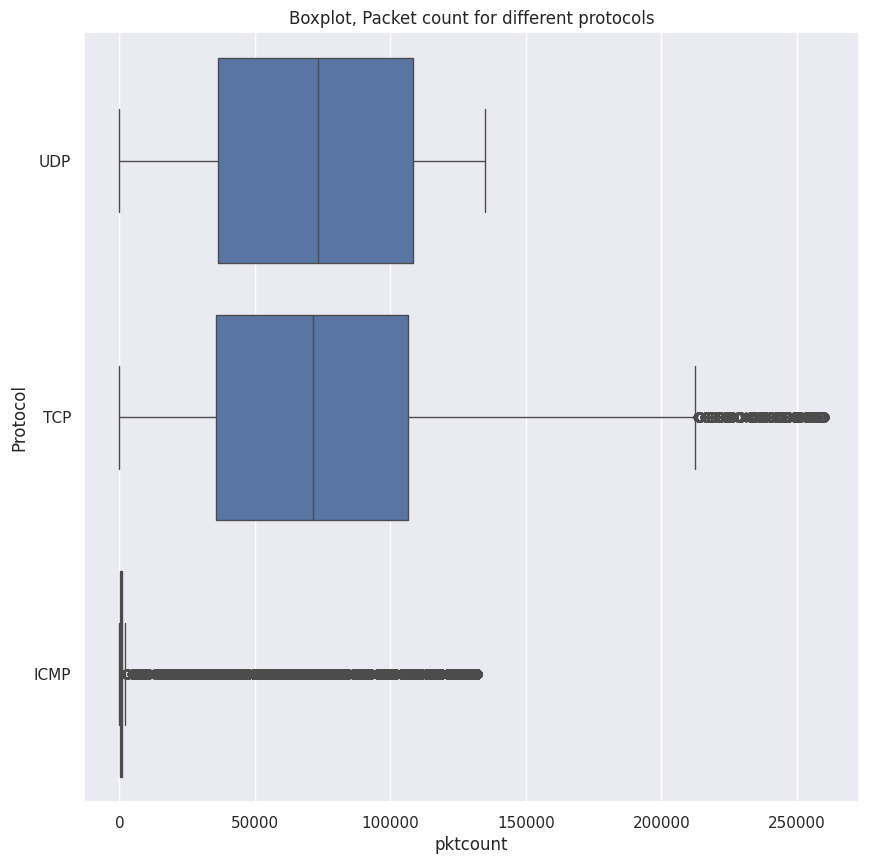

In [34]:
fig, ax = plt.subplots(figsize=[10, 10])
sns.boxplot(
    data=df,
    x='pktcount',
    y='Protocol'
)
ax.set_title('Boxplot, Packet count for different protocols')

#### Heat map of correlation of features

In [35]:
# correlation_matrix = df.corr()
# fig = plt.figure(figsize=(17,17))
# mask = np.zeros_like(correlation_matrix, dtype=np.bool_)
# mask[np.triu_indices_from(mask)]= True
# sns.set_theme(style="darkgrid")

# ax = sns.heatmap(correlation_matrix,square = True,annot=True,center=0,vmin=-1,linewidths = .5,annot_kws = {"size": 11},mask = mask)
# ax.set_xticklabels(ax.get_xticklabels(),rotation=45, horizontalalignment='right');
# plt.show()

In [36]:
print("Features which need to be encoded are : \n" ,categorical_features)

Features which need to be encoded are : 
 ['src', 'dst', 'Protocol']


### Encoding categorical features

In [37]:
df = pd.get_dummies(df, columns=categorical_features,drop_first=True)
print("This Dataframe has {} rows and {} columns after encoding".format(df.shape[0], df.shape[1]))

This Dataframe has 103839 rows and 57 columns after encoding


In [38]:
#dataframe after encoding
df.head(10)

,dt,switch,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,packetins,pktperflow,...,dst_10.0.0.2,dst_10.0.0.3,dst_10.0.0.4,dst_10.0.0.5,dst_10.0.0.6,dst_10.0.0.7,dst_10.0.0.8,dst_10.0.0.9,Protocol_TCP,Protocol_UDP
0,11425,1,45304,48294064,100,716000000,1.010000e+11,3,1943,13535,...,0,0,0,0,0,0,1,0,0,1
1,11605,1,126395,134737070,280,734000000,2.810000e+11,2,1943,13531,...,0,0,0,0,0,0,1,0,0,1
2,11425,1,90333,96294978,200,744000000,2.010000e+11,3,1943,13534,...,0,0,0,0,0,0,1,0,0,1
3,11425,1,90333,96294978,200,744000000,2.010000e+11,3,1943,13534,...,0,0,0,0,0,0,1,0,0,1
4,11425,1,90333,96294978,200,744000000,2.010000e+11,3,1943,13534,...,0,0,0,0,0,0,1,0,0,1
5,11425,1,90333,96294978,200,744000000,2.010000e+11,3,1943,13534,...,0,0,0,0,0,0,1,0,0,1
6,11425,1,45304,48294064,100,716000000,1.010000e+11,3,1943,13535,...,0,0,0,0,0,0,1,0,0,1
7,11425,1,45304,48294064,100,716000000,1.010000e+11,3,1943,13535,...,0,0,0,0,0,0,1,0,0,1
8,11425,1,45304,48294064,100,716000000,1.010000e+11,3,1943,13535,...,0,0,0,0,0,0,1,0,0,1
9,11425,1,90333,96294978,200,744000000,2.010000e+11,3,1943,13534,...,0,0,0,0,0,0,1,0,0,1


In [39]:
df.dtypes

dt                 int64
switch             int64
pktcount           int64
bytecount          int64
dur                int64
dur_nsec           int64
tot_dur          float64
flows              int64
packetins          int64
pktperflow         int64
byteperflow        int64
pktrate            int64
Pairflow           int64
port_no            int64
tx_bytes           int64
rx_bytes           int64
tx_kbps            int64
rx_kbps          float64
tot_kbps         float64
label              int64
src_10.0.0.10      uint8
src_10.0.0.11      uint8
src_10.0.0.12      uint8
src_10.0.0.13      uint8
src_10.0.0.14      uint8
src_10.0.0.15      uint8
src_10.0.0.16      uint8
src_10.0.0.17      uint8
src_10.0.0.18      uint8
src_10.0.0.2       uint8
src_10.0.0.20      uint8
src_10.0.0.3       uint8
src_10.0.0.4       uint8
src_10.0.0.5       uint8
src_10.0.0.6       uint8
src_10.0.0.7       uint8
src_10.0.0.8       uint8
src_10.0.0.9       uint8
dst_10.0.0.10      uint8
dst_10.0.0.11      uint8


### Split into Independent and dependent variables

In [40]:
#separating input and output attributes
x = df.drop(['label'], axis=1)
y = df['label']

### Train-Test-Split [75-25]

In [41]:
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.25, stratify=y, random_state=2)
print(X_train.shape, X_test.shape)

(77879, 56) (25960, 56)


In [42]:
unique, counts = np.unique(y_test, return_counts=True)
dict(zip(unique, counts))

{0: 15834, 1: 10126}

In [43]:
#check if scaling is needed
print(X_train.iloc[1].min())
print(X_train.iloc[1].max())

0.0
60865000000.0


### Normalizing features

### Find the features with 99% variance

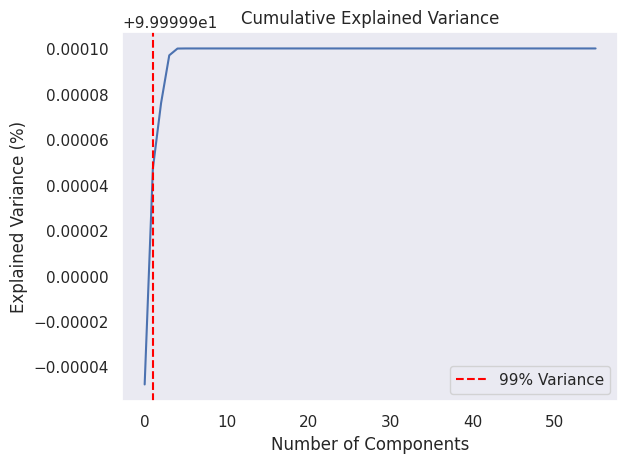

In [44]:
# Assuming X_train is your training data
pca = PCA(n_components=56)  # total 56 columns excluding the class
pca.fit_transform(X_train)

# Find the number of components for 99% variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
n_components_99_percent = np.argmax(cumulative_variance >= 0.99) + 1

# Plot the cumulative explained variance
plt.grid()
plt.plot(np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance (%)')
plt.title('Cumulative Explained Variance')
plt.axvline(x=n_components_99_percent, color='red', linestyle='--', label='99% Variance')
plt.legend()
plt.show()



In [45]:
# Print the number of components for 99% variance
print(f"Number of components for 99% variance: {n_components_99_percent}")

Number of components for 99% variance: 1


In [46]:
#taking care of data leakage doing PCA
# pca = PCA(0.95).fit(X_train)
# X_train = pca.transform(X_train)
# X_test = pca.transform(X_test)
# print(pca.n_components_)

In [47]:
# ms = MinMaxScaler()
# x = ms.fit_transform(x)

## BASELINE CLASSIFIERS
1. DNN
2. KNN
3. SVM
4. Decision tree
5. Naive Bayes
6. Quadratic Discriminant Analaysis
7. SGD
8. Logistic Regression
9. XGBoost

#### Deep Neural Network

In [48]:
Classifier_accuracy = []

## Defining the Deep Neural Network

In [49]:
# Define and compile model
model = keras.Sequential()
model.add(Dense(28 , input_shape=(pca.n_components_,) , activation="relu" , name="Hidden_Layer_1"))
model.add(Dense(10 , activation="relu" , name="Hidden_Layer_2"))
model.add(Dense(1 , activation="sigmoid" , name="Output_Layer"))
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile( optimizer=opt, loss="binary_crossentropy", metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden_Layer_1 (Dense)      (None, 28)                1596      
                                                                 
 Hidden_Layer_2 (Dense)      (None, 10)                290       
                                                                 
 Output_Layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 1897 (7.41 KB)
Trainable params: 1897 (7.41 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Model fitting

In [50]:
# fit model
history_org = model.fit(
    X_train,
    y_train,
    batch_size=32,
    epochs=100, verbose=2,
    callbacks=None,
    validation_data=(X_test,y_test),
    shuffle=True,
    class_weight=None,
    sample_weight=None,
    initial_epoch=0)

Epoch 1/100
2434/2434 - 13s - loss: 71064592.0000 - accuracy: 0.5910 - val_loss: 46.5182 - val_accuracy: 0.6105 - 13s/epoch - 5ms/step
Epoch 2/100
2434/2434 - 9s - loss: 234.9332 - accuracy: 0.6105 - val_loss: 15.3665 - val_accuracy: 0.6103 - 9s/epoch - 4ms/step
Epoch 3/100
2434/2434 - 9s - loss: 13.7398 - accuracy: 0.6104 - val_loss: 0.6690 - val_accuracy: 0.6102 - 9s/epoch - 4ms/step
Epoch 4/100
2434/2434 - 9s - loss: 3.7380 - accuracy: 0.6103 - val_loss: 0.6686 - val_accuracy: 0.6102 - 9s/epoch - 4ms/step
Epoch 5/100
2434/2434 - 8s - loss: 0.6686 - accuracy: 0.6103 - val_loss: 0.6687 - val_accuracy: 0.6102 - 8s/epoch - 3ms/step
Epoch 6/100
2434/2434 - 11s - loss: 0.6687 - accuracy: 0.6103 - val_loss: 0.6686 - val_accuracy: 0.6102 - 11s/epoch - 5ms/step
Epoch 7/100
2434/2434 - 9s - loss: 0.6686 - accuracy: 0.6103 - val_loss: 0.6686 - val_accuracy: 0.6102 - 9s/epoch - 4ms/step
Epoch 8/100
2434/2434 - 9s - loss: 0.6686 - accuracy: 0.6103 - val_loss: 0.6686 - val_accuracy: 0.6102 - 9s/e

## Plotting Loss v/s Epochs

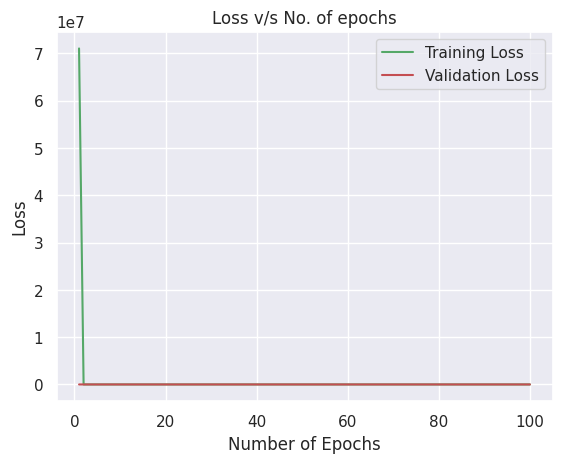

In [51]:
loss = history_org.history['loss']
val_loss = history_org.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'g', label = 'Training Loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation Loss')
plt.title('Loss v/s No. of epochs')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Plotting Accuracy v/s Epochs

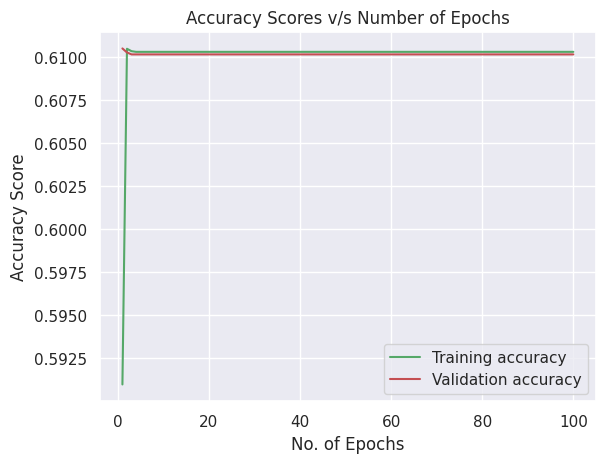

In [52]:
loss = history_org.history['accuracy']
val_loss = history_org.history['val_accuracy']
plt.plot(epochs, loss, 'g', label = 'Training accuracy')
plt.plot(epochs, val_loss, 'r', label = 'Validation accuracy')
plt.title('Accuracy Scores v/s Number of Epochs')
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy Score')
plt.legend()
plt.show()

## Model Evaluation

In [53]:
loss, accuracy = model.evaluate(X_test, y_test)
print('Accuracy of Deep neural Network : %.2f' % (accuracy*100))
Classifier_accuracy.append(accuracy*100)

812/812 [==============================] - 2s 3ms/step - loss: 0.6691 - accuracy: 0.6102
Accuracy of Deep neural Network : 61.02


#### K-Nearest Neighbor Classifier

In [54]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)
y_pred = knn_clf.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
Classifier_accuracy.append(accuracy*100)
print("Accuracy of KNN Classifier : %.2f" % (accuracy*100))

Accuracy of KNN Classifier : 88.66


#### SVM Classifier

In [55]:
svc_clf = SVC()
svc_clf.fit(X_train,y_train)
y_pred = svc_clf.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
Classifier_accuracy.append(accuracy*100)
print("Accuracy of SVM Classifier : %.2f" % (accuracy*100) )

Accuracy of SVM Classifier : 66.63


#### Decision Tree Classifier

In [56]:
dt_clf = DecisionTreeClassifier(max_depth=5)
dt_clf.fit(X_train,y_train)
y_pred = dt_clf.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
Classifier_accuracy.append(accuracy*100)
print("Accuracy of Decision Tree Classifier : %.2f" % (accuracy*100) )

Accuracy of Decision Tree Classifier : 96.51


#### Naive Bayes Classifier

In [57]:
nb_clf = GaussianNB()
nb_clf.fit(X_train,y_train)
y_pred = nb_clf.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
Classifier_accuracy.append(accuracy*100)
print("Accuracy of Naive Bayes Classifier : %.2f" % (accuracy*100) )

Accuracy of Naive Bayes Classifier : 62.84


#### Quadratic Discriminant Analysis Classifier

In [58]:
qda_clf=QuadraticDiscriminantAnalysis()
qda_clf.fit(X_train,y_train)
y_pred=qda_clf.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
Classifier_accuracy.append(accuracy*100)
print("Accuracy of QDA Classifier : %.2f" % (accuracy*100))

Accuracy of QDA Classifier : 75.72


#### Stochastic Gradient Classifier

In [59]:
sgd_clf=SGDClassifier(loss="hinge", penalty="l2")
sgd_clf.fit(X_train,y_train)
y_pred=sgd_clf.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
Classifier_accuracy.append(accuracy*100)
print("Accuracy of SGD Classifier : %.2f" % (accuracy*100))

Accuracy of SGD Classifier : 54.54


#### Logistic Regression

In [60]:
lr_clf = LogisticRegression()
lr_clf.fit(X_train,y_train)
y_pred=lr_clf.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
Classifier_accuracy.append(accuracy*100)
print("Accuracy of Logistic Regression Classifier : %.2f" % (accuracy*100))

Accuracy of Logistic Regression Classifier : 60.69


#### XGBoost Classifier

In [61]:
xgb_clf=xgb.XGBClassifier(eval_metric = 'error',objective='binary:logistic',max_depth=2, learning_rate=0.1)
xgb_clf.fit(X_train,y_train)
y_pred=xgb_clf.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
Classifier_accuracy.append(accuracy*100)
print("Accuracy of XGBoost Classifier : %.2f" % (accuracy*100))

Accuracy of XGBoost Classifier : 97.97


### Comparitive analysis of models

In [62]:
Classifier_names = ["DNN", "KNN", "RBF_SVM", "Decision Tree","Quadratic","SGD","Logistic Regression","XGBoost","Naive Bayes"]

In [63]:
print(len(Classifier_names))
print(len(Classifier_accuracy))

9
9


In [64]:
df_clf = pd.DataFrame()
df_clf['name'] = Classifier_names
df_clf['Accuracy'] = Classifier_accuracy
df_clf = df_clf.sort_values(by=['Accuracy'], ascending=False)
df_clf.head(10)

,name,Accuracy
8,Naive Bayes,97.973806
3,Decision Tree,96.510015
1,KNN,88.659476
5,SGD,75.720339
2,RBF_SVM,66.633282
4,Quadratic,62.835131
0,DNN,61.016947
7,XGBoost,60.689522
6,Logistic Regression,54.537750


#### Visualize accuracies of the models

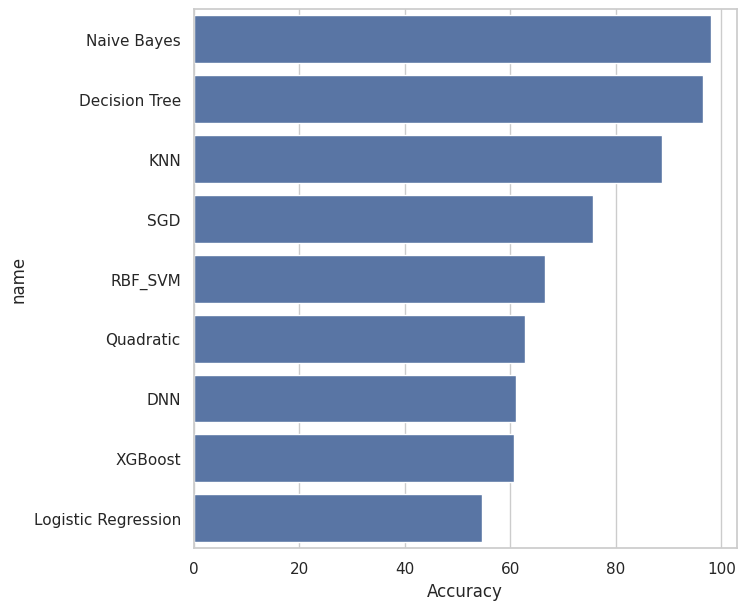

In [65]:
sns.set(style="whitegrid",rc={'figure.figsize':(7,7)})
ax = sns.barplot(y="name", x="Accuracy", data=df_clf)

In [66]:
print(f"The best baseline Classifier is {df_clf.name[0]} with an accuracy of {df_clf.Accuracy[0]}.")

The best baseline Classifier is DNN with an accuracy of 61.01694703102112.


## Hyperparameter tuning

In [78]:
def model_builder(hp):
    model = keras.Sequential()

    model.add(Dense(28, input_shape=(56,), activation="relu", name="Hidden_Layer_1"))
    model.add(Dense(10, activation="relu", name="Hidden_Layer_2"))
    model.add(Dense(1, activation="sigmoid", name="Output_Layer"))

    opt = keras.optimizers.Adam(learning_rate=0.01)

    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model

ALTERNATIVE CODE :-

In [76]:
# def model_builder(hp):
#     model = keras.Sequential()
#     model.add(keras.layers.Dense(units=hp.Int('units', min_value=32, max_value=512, step=32), activation='relu'))
#     model.add(keras.layers.Dense(10, activation='softmax'))

#     model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate',[1e-2, 1e-3, 1e-4])),
#                   loss='binary_crossentropy',
#                   metrics=['accuracy'])

#     return model


In [84]:
# tuner.search(X_train, y_train, epochs=100, validation_data=(X_test,y_test), batch_size = 32)


In [80]:
from keras_tuner.tuners import RandomSearch
tuner = RandomSearch(model_builder, objective='val_accuracy', max_trials=3, executions_per_trial=2, directory='ddos', project_name='ddos_isa', overwrite=True)

In [81]:
tuner.search_space_summary()

Search space summary
Default search space size: 1
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [83]:
tuner.search(X_train, y_train, epochs=10, validation_data=(X_test,y_test), batch_size = 32)

Trial 3 Complete [00h 04m 13s]
val_accuracy: 0.6662750244140625

Best val_accuracy So Far: 0.6727657914161682
Total elapsed time: 00h 13m 19s


In [85]:
tuner.results_summary()

Results summary
Results in ddos/ddos_isa
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 1 summary
Hyperparameters:
learning_rate: 0.0001
Score: 0.6727657914161682

Trial 2 summary
Hyperparameters:
learning_rate: 0.001
Score: 0.6662750244140625

Trial 0 summary
Hyperparameters:
learning_rate: 0.01
Score: 0.6104584038257599


## Best Hyperparameters

In [86]:
def model_builder(hp):
    model = keras.Sequential()
    model.add(keras.layers.Dense(units=hp.Int('units', min_value=32, max_value=512, step=32), activation='relu'))
    model.add(keras.layers.Dense(10, activation='softmax'))

    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate',[1e-2, 1e-3, 1e-4])),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model


In [87]:
modified_model = tuner.get_best_models(num_models=1)[0]


In [88]:
modified_model = tuner.get_best_models(num_models=1)[0]
modified_hparam=tuner.get_best_hyperparameters(num_trials=1)[0]
tuner.get_best_hyperparameters()[0].values

{'learning_rate': 0.0001}

## Model Evaluation

In [89]:
loss, accuracy = modified_model.evaluate(X_test, y_test)

812/812 [==============================] - 2s 2ms/step - loss: 970571.5625 - accuracy: 0.6736


## Get Best value for epoch

In [90]:
model = tuner.hypermodel.build(modified_hparam)
history = model.fit(X_train, y_train, batch_size=32, epochs=100, verbose=1, validation_data=(X_test,y_test))
val_per_epoch = history.history['val_accuracy']
modified_epoch = val_per_epoch.index(max(val_per_epoch)) + 1
print('Best epoch value: %d' % (modified_epoch,))

Epoch 1/100
2434/2434 [==============================] - 17s 6ms/step - loss: 301600384.0000 - accuracy: 0.5445 - val_loss: 18498524.0000 - val_accuracy: 0.6173
Epoch 2/100
2434/2434 [==============================] - 10s 4ms/step - loss: 12384051.0000 - accuracy: 0.5621 - val_loss: 3752730.5000 - val_accuracy: 0.4482
Epoch 3/100
2434/2434 [==============================] - 11s 5ms/step - loss: 12967359.0000 - accuracy: 0.5670 - val_loss: 6464250.5000 - val_accuracy: 0.5545
Epoch 4/100
2434/2434 [==============================] - 10s 4ms/step - loss: 11599272.0000 - accuracy: 0.5777 - val_loss: 2847885.0000 - val_accuracy: 0.6800
Epoch 5/100
2434/2434 [==============================] - 11s 4ms/step - loss: 11880284.0000 - accuracy: 0.5796 - val_loss: 3605708.5000 - val_accuracy: 0.6297
Epoch 6/100
2434/2434 [==============================] - 11s 4ms/step - loss: 11284529.0000 - accuracy: 0.5821 - val_loss: 27920630.0000 - val_accuracy: 0.6134
Epoch 7/100
2434/2434 [====================

## Plot of Loss v/s Epochs for hypermodel

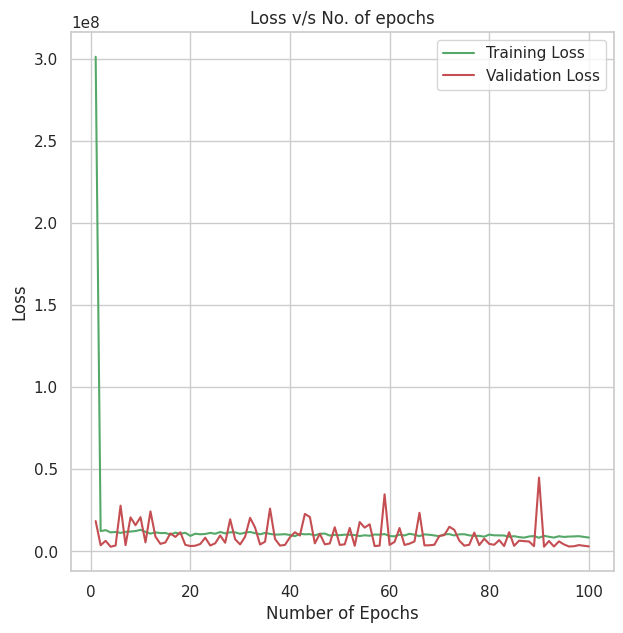

In [91]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'g', label = 'Training Loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation Loss')
plt.title('Loss v/s No. of epochs')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Plot for Accuracy v/s Epochs for hypermodel

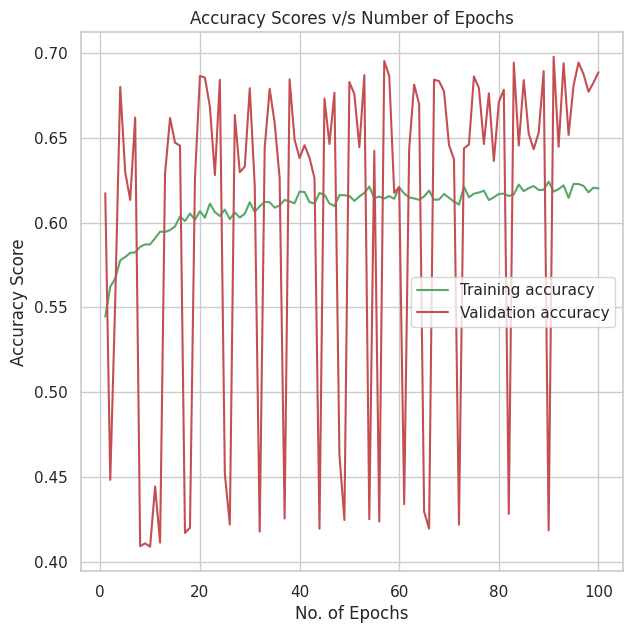

In [92]:
loss = history.history['accuracy']
val_loss = history.history['val_accuracy']
plt.plot(epochs, loss, 'g', label = 'Training accuracy')
plt.plot(epochs, val_loss, 'r', label = 'Validation accuracy')
plt.title('Accuracy Scores v/s Number of Epochs')
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy Score')
plt.legend()
plt.show()

## Final Model

In [93]:
hypermodel = tuner.hypermodel.build(modified_hparam)

## Fitting the hypermodel

In [94]:
hypermodel.fit(X_train, y_train, batch_size=32, epochs=modified_epoch, validation_data=(X_test, y_test), initial_epoch=0)

Epoch 1/91
2434/2434 [==============================] - 11s 4ms/step - loss: 2910007552.0000 - accuracy: 0.4881 - val_loss: 27831.1895 - val_accuracy: 0.6097
Epoch 2/91
2434/2434 [==============================] - 10s 4ms/step - loss: 109267.2656 - accuracy: 0.5344 - val_loss: 69315.6016 - val_accuracy: 0.6117
Epoch 3/91
2434/2434 [==============================] - 12s 5ms/step - loss: 66630.6328 - accuracy: 0.5319 - val_loss: 2392.0049 - val_accuracy: 0.3924
Epoch 4/91
2434/2434 [==============================] - 12s 5ms/step - loss: 14530.9893 - accuracy: 0.5371 - val_loss: 30.5170 - val_accuracy: 0.4462
Epoch 5/91
2434/2434 [==============================] - 11s 4ms/step - loss: 213.3725 - accuracy: 0.5902 - val_loss: 0.8367 - val_accuracy: 0.6107
Epoch 6/91
2434/2434 [==============================] - 11s 4ms/step - loss: 123.6431 - accuracy: 0.6086 - val_loss: 163.2788 - val_accuracy: 0.6105
Epoch 7/91
2434/2434 [==============================] - 10s 4ms/step - loss: 143.2463 - ac

In [95]:
hypermodel.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden_Layer_1 (Dense)      (None, 28)                1596      
                                                                 
 Hidden_Layer_2 (Dense)      (None, 10)                290       
                                                                 
 Output_Layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 1897 (7.41 KB)
Trainable params: 1897 (7.41 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Printing the final accuracy and loss values of the hypermodel

In [96]:
result_final = hypermodel.evaluate(X_test, y_test, batch_size=32)
print("[Loss, Accuracy]:", result_final)

812/812 [==============================] - 2s 2ms/step - loss: 16.4657 - accuracy: 0.6102
[Loss, Accuracy]: [16.465681076049805, 0.6102080345153809]


## Making Sample Predictions

In [97]:
classes = model.predict(X_test)
print(classes)

812/812 [==============================] - 1s 2ms/step
[[1.]
 [0.]
 [1.]
 ...
 [0.]
 [1.]
 [0.]]


In [98]:
y_pred = []
for i in classes:
    if i > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [99]:
y_pred[:20]

[1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0]

In [100]:
y_test[:20]

21070     1
14566     0
81384     0
27012     1
38373     1
23369     1
18815     0
73676     0
40330     1
33321     1
66634     0
51914     0
3504      1
12789     0
102543    0
62850     1
6690      0
12814     0
70323     1
40862     1
Name: label, dtype: int64

## Classification Report

In [101]:
print(classification_report(y_test, y_pred, target_names = labels))

              precision    recall  f1-score   support

      benign       0.73      0.77      0.75     15834
      malign       0.61      0.56      0.58     10126

    accuracy                           0.69     25960
   macro avg       0.67      0.67      0.67     25960
weighted avg       0.68      0.69      0.69     25960



## Plotting Confusion Matrix

In [102]:
from itertools import product
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.figure(figsize=(10,10))
    plt.grid(False)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    cm1 = cm
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)]
        thresh = cm.max() / 2.
    for i, j in product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, str(cm1[i, j])+ " ("+ str(cm[i, j]*100)+"%)",
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

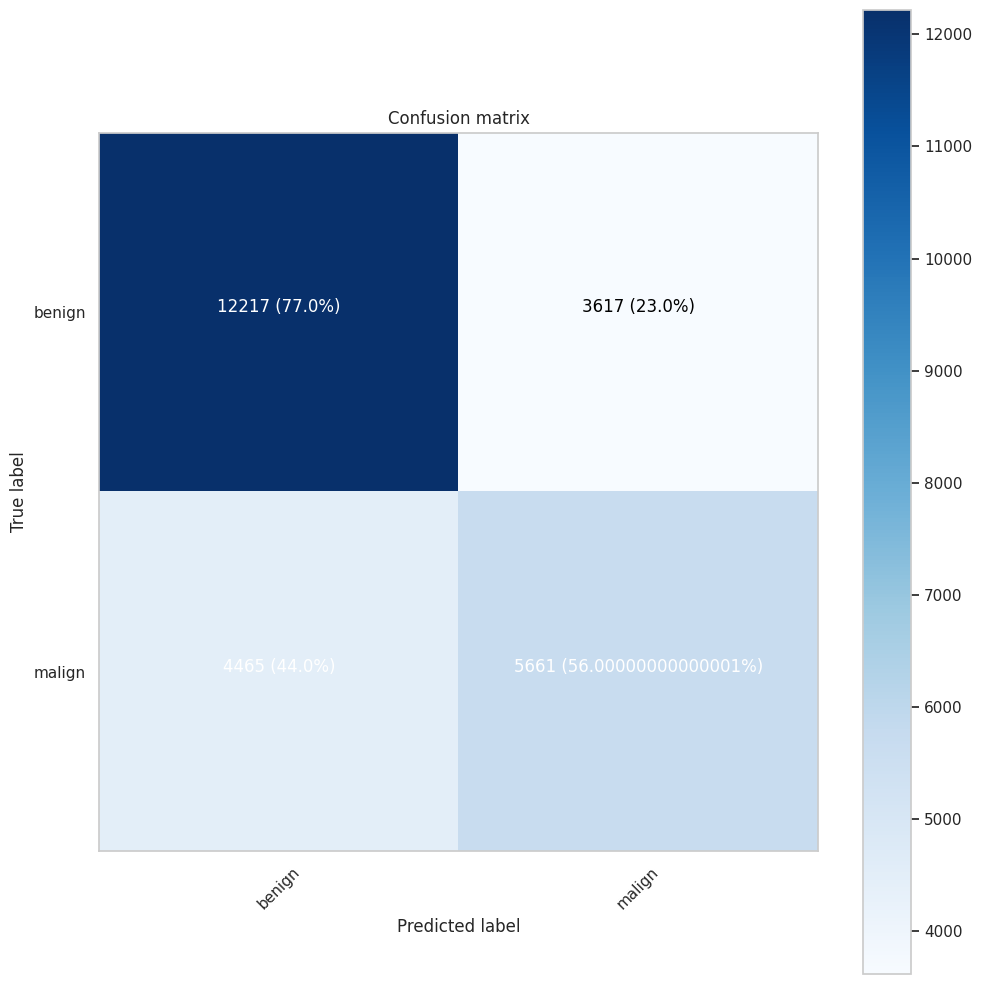

In [103]:
confusion_mtx = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(confusion_mtx, classes = labels)

## Displaying ROC-AUC curve

In [104]:
def model_builder_crv(X_train, X_test, y_train, y_test):
    model = keras.Sequential()

    model.add(Dense(28 , input_shape=(56,) , activation="relu" , name="Hidden_Layer_1"))
    model.add(Dense(10 , activation="relu" , name="Hidden_Layer_2"))
    model.add(Dense(1 , activation="sigmoid" , name="Output_Layer"))
    opt = keras.optimizers.Adam(learning_rate=0.01)

    model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=[tf.keras.metrics.AUC()])
    history = model.fit(X_train,y_train,epochs=100,verbose=0,callbacks=None,validation_data=(X_test,y_test))

    return history, model.layers, model

In [106]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming model_builder_crv is a function that returns a Keras model
model = model_builder_crv()

# Ensure X_test is properly preprocessed if needed
# For example, if your model expects normalized data, ensure X_test is normalized

# Call the model to get predictions on the test data
y_predicted = model.predict(X_test)

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_predicted)
auc_crv = auc(fpr, tpr)
print(f"Area under the curve (AUC) is: {auc_crv}")

# Plot ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, label=f'AUC = {auc_crv:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


TypeError: model_builder_crv() missing 4 required positional arguments: 'X_train', 'X_test', 'y_train', and 'y_test'

In [105]:
# from sklearn.metrics import roc_curve, auc
# plt.figure(figsize=(20,20))
# history,model_layers,model = model_builder_crv(X_train, X_test, y_train, y_test)
# y_predicted = model(X_test)
# fpr, tpr, keras_thr = roc_curve(y_test, y_predicted)
# auc_crv = auc(fpr, tpr)
# print(f"Area under the curve(AUC) is: {auc_crv}")
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.plot(fpr, tpr)
# plt.title("ROC curve")
# plt.show()

AttributeError: Exception encountered when calling layer 'sequential_3' (type Sequential).

'tuple' object has no attribute 'rank'

Call arguments received by layer 'sequential_3' (type Sequential):
  • inputs=           dt  switch  pktcount  bytecount  dur   dur_nsec       tot_dur  \
21070    2679       2     57240   59644080  195  755000000  1.960000e+11   
14566   11995       4     22690   24187540   50  623000000  5.062300e+10   
81384   15215       6     39120    2268960  124  878000000  1.250000e+11   
27012    2649       4    108745  115922170  263  631000000  2.640000e+11   
38373   24791       2    151833    8198982  265  498000000  2.650000e+11   
...       ...     ...       ...        ...  ...        ...           ...   
100058   6582       3       617      60466  631  558000000  6.320000e+11   
21867    2979       2    123625  128817250  447  485000000  4.470000e+11   
91390   30861       6       697      68306  713  206000000  7.130000e+11   
88493   24480       3        41       4018   42  924000000  4.292400e+10   
77744   42215       3     94115    6212154  301  174000000  3.010000e+11   

        flows  packetins  pktperflow  ...  dst_10.0.0.2  dst_10.0.0.3  \
21070       3       2385        7674  ...             0             1   
14566       3       2242       13387  ...             0             0   
81384       5      11471        9098  ...             0             0   
27012       3       2385        2369  ...             0             1   
38373       5      10817       15854  ...             0             0   
...       ...        ...         ...  ...           ...           ...   
100058      5       3421          29  ...             1             0   
21867       2       4440        7356  ...             0             1   
91390       5       4920          29  ...             0             0   
88493       3         22          29  ...             1             0   
77744       9      13231        8903  ...             0             0   

        dst_10.0.0.4  dst_10.0.0.5  dst_10.0.0.6  dst_10.0.0.7  dst_10.0.0.8  \
21070              0             0             0             0             0   
14566              0             0             0             0             1   
81384              0             0             0             0             0   
27012              0             0             0             0             0   
38373              1             0             0             0             0   
...              ...           ...           ...           ...           ...   
100058             0             0             0             0             0   
21867              0             0             0             0             0   
91390              0             0             0             0             0   
88493              0             0             0             0             0   
77744              0             0             0             0             0   

        dst_10.0.0.9  Protocol_TCP  Protocol_UDP  
21070              0             0             1  
14566              0             0             1  
81384              0             1             0  
27012              0             0             1  
38373              0             1             0  
...              ...           ...           ...  
100058             0             0             0  
21867              0             0             1  
91390              0             0             0  
88493              0             0             0  
77744              1             1             0  

[25960 rows x 56 columns]
  • training=None
  • mask=None

<Figure size 2000x2000 with 0 Axes>